# 31 使用PCA进行降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [4]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [5]:
example_digits.shape

(100, 64)

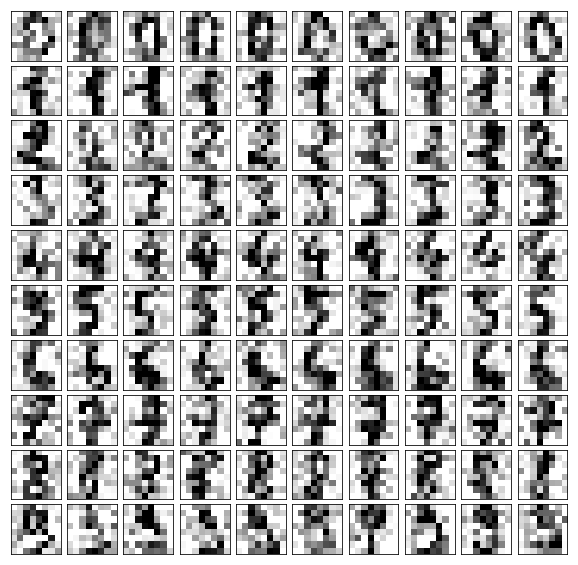

In [6]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.show()

plot_digits(example_digits)

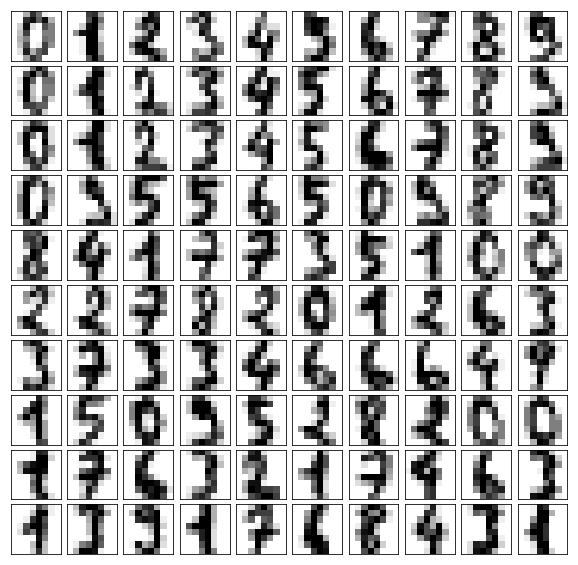

In [7]:
plot_digits(X)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.n_components_

12

In [11]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

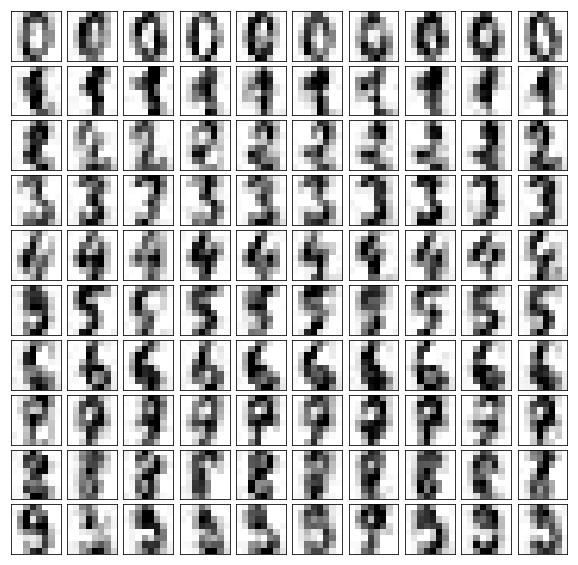

In [12]:
plot_digits(filtered_digits)